In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


In [2]:
# Load the CSV file
csv_path = os.path.expanduser(input("What is the CSV file's path?\n"))
df = pd.read_csv(csv_path)



Cleaned Columns in the CSV file: ['Groundtruth_Fly1', 'Groundtruth_Fly2', 'DANCE_Fly1', 'DANCE_Fly2', 'Divider_Fly1', 'Divider_Fly2', 'CADABRA_Fly1', 'CADABRA_Fly2']


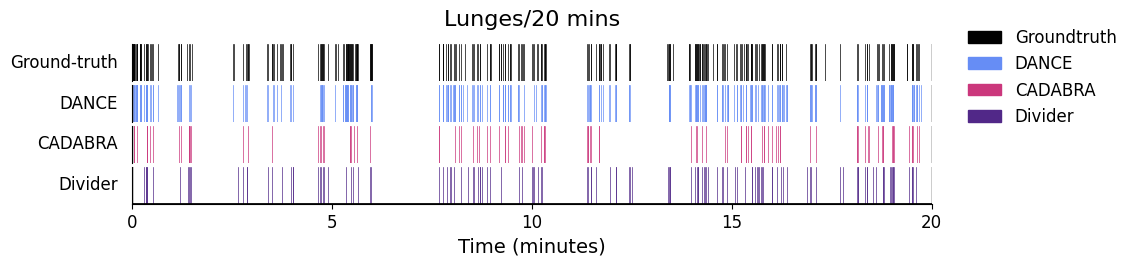

In [5]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Print the cleaned column names to confirm
print("Cleaned Columns in the CSV file:", df.columns.tolist())

# Define columns for Fly 1 and Fly 2 data
fly1_columns = ['Groundtruth_Fly1', 'DANCE_Fly1', 'CADABRA_Fly1', 'Divider_Fly1']
fly2_columns = ['Groundtruth_Fly2', 'DANCE_Fly2', 'CADABRA_Fly2', 'Divider_Fly2']

# Combine Fly 1 and Fly 2 data for each type, with error handling for missing columns
Groundtruth_frames = pd.concat([df['Groundtruth_Fly1'], df['Groundtruth_Fly2']] if 'Groundtruth_Fly2' in df.columns else df['Groundtruth_Fly1']).dropna().values.flatten()
dance_frames = pd.concat([df['DANCE_Fly1'], df['DANCE_Fly2']] if 'DANCE_Fly2' in df.columns else df['DANCE_Fly1']).dropna().values.flatten()
cadabra_frames = pd.concat([df['CADABRA_Fly1'], df['CADABRA_Fly2']] if 'CADABRA_Fly2' in df.columns else df['CADABRA_Fly1']).dropna().values.flatten()
divider_frames = pd.concat([df['Divider_Fly1'], df['Divider_Fly2']] if 'Divider_Fly2' in df.columns else df['Divider_Fly1']).dropna().values.flatten()

# Convert frame numbers to time in minutes (assuming 30 fps)
frame_rate = 30
Groundtruth_frames_in_minutes = Groundtruth_frames / (frame_rate * 60)
dance_frames_in_minutes = dance_frames / (frame_rate * 60)
cadabra_frames_in_minutes = cadabra_frames / (frame_rate * 60)
divider_frames_in_minutes = divider_frames / (frame_rate * 60)

# Create a figure to hold all subplots (change it accordingly)
fig, axs = plt.subplots(4, 1, figsize=(10, 2), sharex=True, gridspec_kw={'hspace': 0.1}) 

# Function to plot raster plots for single frames
def plot_raster(ax, frames, color, label):
    for frame in frames:
        ax.plot([frame, frame], [0, 1], color=color, lw=0.5, label=label)  # Reduced line width to 1.0
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 20)  # Adjusting for a 20-minute video

# Define colors 
line_color = 'black'
raster_colors = {
    'Groundtruth': (0/255, 0/255, 0/255),
    'DANCE': (102/255, 141/255, 245/255),
    'CADABRA': (203/255, 55/255, 124/255),  
    'Divider': (81/255, 40/255, 136/255)
}

# Plot each set of behavior frames in its respective subplot with labels
plot_raster(axs[0], Groundtruth_frames_in_minutes, raster_colors['Groundtruth'], 'Groundtruth')
plot_raster(axs[1], dance_frames_in_minutes, raster_colors['DANCE'], 'DANCE')
plot_raster(axs[2], cadabra_frames_in_minutes, raster_colors['CADABRA'], 'CADABRA')
plot_raster(axs[3], divider_frames_in_minutes, raster_colors['Divider'], 'Divider')

# Set y-axis label for the first subplot of each type
axs[0].set_ylabel('Ground-truth', fontsize=12, labelpad=10, rotation=0, ha='right', va='center')
axs[1].set_ylabel('DANCE', fontsize=12, labelpad=10, rotation=0, ha='right', va='center')
axs[2].set_ylabel('CADABRA', fontsize=12, labelpad=10, rotation=0, ha='right', va='center')
axs[3].set_ylabel('Divider', fontsize=12, labelpad=10, rotation=0, ha='right', va='center')

# Add a solid horizontal line to separate sets of subplots
axs[3].axhline(y=0, color=line_color, linewidth=2)

# Remove extra legend entries by creating legend only once
legend_patches = [
    patches.Patch(color=raster_colors['Groundtruth'], label='Groundtruth'),
    patches.Patch(color=raster_colors['DANCE'], label='DANCE'),
    patches.Patch(color=raster_colors['CADABRA'], label='CADABRA'),
    patches.Patch(color=raster_colors['Divider'], label='Divider')
]

# Add legend to the right of the plot area
fig.legend(handles=legend_patches, loc='upper right', fontsize=12, frameon=False, bbox_to_anchor=(1.1, 1))

# Add a title to the figure
plt.suptitle('Lunges/20 mins', fontsize=16, y=1.02)  # Adjust y value to avoid overlap

# Remove y-axis ticks and labels, and keep y-axis boundaries visible
for ax in axs:
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Keep the bottom spine visible for the last subplot
axs[-1].spines['bottom'].set_visible(True)

# Set x-axis ticks and reduced font size
xticks = np.arange(0, 21, 5)  # Adjusted for a 20-minute video
axs[-1].set_xticks(xticks)
axs[-1].tick_params(axis='x', labelsize=12)
axs[-1].set_xlabel('Time (minutes)', fontsize=14)

# Hide x-axis for the top subplots
for ax in axs[:-1]:
    ax.xaxis.set_visible(False)

# Add vertical lines on both sides to create a box effect
for ax in axs:
    ax.axvline(x=0, color=line_color, linewidth=1)
    ax.axvline(x=20, color=line_color, linewidth=1)

# Adjust layout
plt.subplots_adjust(hspace=0.2, wspace=0, top=0.85, bottom=0.05, left=0.1, right=0.9)  # Adjust top value for title space

# Save the plot as an image in the same directory as the input CSV file
base_name = os.path.splitext(os.path.basename(csv_path))[0]
input_directory = os.path.dirname(csv_path)
image_file = os.path.join(input_directory, f"{base_name}_raster_plot.png")
plt.savefig(image_file, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()




<Figure size 640x480 with 0 Axes>